In [106]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 

In [18]:
#Read the dataset
data_df = pd.read_csv("../data/train.csv")

In [108]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore Numeric features

In [109]:
data_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [110]:
data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [111]:
# data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'],errors='coerce')
#Fill the missing values with with the median/ mode value
data_df['Age'] = data_df['Age'].fillna(data_df['Age'].median())
data_df['Age'] = data_df['Age'].fillna(data_df['Age'].median())
data_df['Embarked'] = data_df['Embarked'].fillna(data_df['Embarked'].mode()[0])

### Data preprocessing

In [112]:
# These columns are not useful as the feature us used for identification of employees. 
data_df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'],axis=1,inplace = True)

# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
# data_df['Churn'] = data_df[['Churn']].apply(binary_map)

# Encoding gender category
data_df['Sex'] = data_df['Sex'].map({'male':1, 'female':0})

#Encoding other binary category
# binary_list = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
# data_df[binary_list] = data_df[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
data_df = pd.get_dummies(data_df, drop_first=True)

In [113]:
data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,1
1,1,1,0,38.0,1,0,0,0
2,1,3,0,26.0,0,0,0,1
3,1,1,0,35.0,1,0,0,1
4,0,3,1,35.0,0,0,0,1


In [114]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_df['Age'] = sc.fit_transform(data_df[['Age']])
# data_df['MonthlyCharges'] = sc.fit_transform(data_df[['MonthlyCharges']])
# data_df['TotalCharges'] = sc.fit_transform(data_df[['TotalCharges']])

#### Creating a baseline model

In [115]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = data_df.drop('Survived', axis=1)
y = data_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)  

In [116]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

In [117]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.7947761194029851
precision:  0.7865168539325843
recall:  0.660377358490566
f1_score:  0.7909460143451477


In [118]:
# Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

C:\Users\Sisira\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



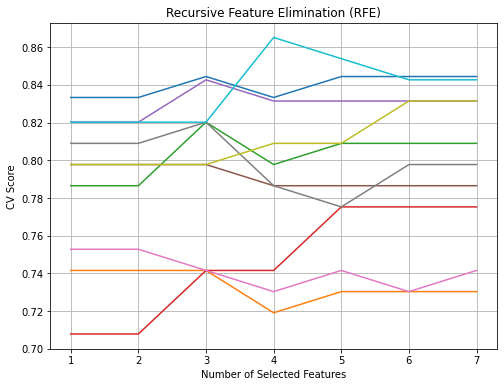

The optimal number of features: 7


In [119]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [120]:
#Saving dataframe with optimal features
X_rfe = X.iloc[:, rfecv.support_]

#Overview of the optimal features in comparison with the intial dataframe
print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (891, 7)
"X" column list: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']
"X_rfe" dimension: (891, 7)
"X_rfe" column list: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']


In [121]:
# Splitting data with optimal features
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)  

In [122]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification')

Logistic Regression Classification
accuracy:  0.7947761194029851
precision:  0.7865168539325843
recall:  0.660377358490566
f1_score:  0.7909460143451477


In [123]:
### Trying other machine learning algorithms: SVC
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.8208955223880597
precision:  0.8372093023255814
recall:  0.6792452830188679
f1_score:  0.8167736896910796


In [124]:
#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.7761194029850746
precision:  0.7395833333333334
recall:  0.6698113207547169
f1_score:  0.7739293099923988


In [125]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.7686567164179104
precision:  0.72
recall:  0.6792452830188679
f1_score:  0.7673907602323774


In [126]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.8171641791044776
precision:  0.7766990291262136
recall:  0.7547169811320755
f1_score:  0.8166906567203488


In [127]:
## Improve best model by hyperparameter tuning
# define model
model = LogisticRegression()

# define evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)

# define search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_rfe, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8020765709529754
Best Hyperparameters: {'C': 0.09657674345991848, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\Sisira\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sisira\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sisira\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sisira\AppData\Roaming\Python\Python310\site-packages\s

In [128]:
params = result.best_params_
params

{'C': 0.09657674345991848, 'penalty': 'l2', 'solver': 'newton-cg'}

In [129]:
#Improving the Logistic Regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification', params=params)

Logistic Regression Classification
accuracy:  0.8059701492537313
precision:  0.8292682926829268
recall:  0.6415094339622641
f1_score:  0.800275949672036


In [130]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(log_model, filename)

['model.sav']

~ The End ~